In [58]:
# install.packages(c("factoextra", "ggpubr", "dplyr", "qqman"))
library(ggpubr)
library(factoextra)
library(dplyr)
library(qqman)

In [2]:
setwd("D://LA//ATI Data")
df <- read.table(file="Anomalies.txt", header=T, sep=",")
df<- df[,-1]

head(df, 10)
dim(df)
str(df)

UserName,SrcDevice,DstDevice,Authent.Type,Failure,DailyCount
User341813,Comp948451,Comp915658,NetworkLogon,0,1
User341813,Comp948451,Comp915658,NetworkLogon,0,1
User341813,Comp948451,Comp915658,NetworkLogon,0,1
User341813,Comp948451,Comp915658,NetworkLogon,0,1
User341813,Comp948451,Comp915658,NetworkLogon,0,1
User341813,Comp948451,Comp915658,NetworkLogon,0,1
User341813,Comp948451,Comp915658,NetworkLogon,0,1
User341813,Comp948451,Comp915658,NetworkLogon,0,1
User341813,Comp948451,Comp004340,TGS,0,1
User341813,Comp948451,Comp004340,TGS,0,1


[1] 20412     6

'data.frame':	20412 obs. of  6 variables:
 $ UserName    : Factor w/ 81 levels "Administrator",..: 30 30 30 30 30 30 30 30 30 30 ...
 $ SrcDevice   : Factor w/ 489 levels "ActiveDirectory",..: 460 460 460 460 460 460 460 460 460 460 ...
 $ DstDevice   : Factor w/ 288 levels "ActiveDirectory",..: 258 258 258 258 258 258 258 258 2 2 ...
 $ Authent.Type: Factor w/ 12 levels "Batch","CachedInteractive",..: 4 4 4 4 4 4 4 4 9 9 ...
 $ Failure     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DailyCount  : num  1 1 1 1 1 1 1 1 1 1 ...


In [3]:
df %>% mutate(across(where(is.factor), as.character)) -> df

str(df)

'data.frame':	20412 obs. of  6 variables:
 $ UserName    : chr  "User341813" "User341813" "User341813" "User341813" ...
 $ SrcDevice   : chr  "Comp948451" "Comp948451" "Comp948451" "Comp948451" ...
 $ DstDevice   : chr  "Comp915658" "Comp915658" "Comp915658" "Comp915658" ...
 $ Authent.Type: chr  "NetworkLogon" "NetworkLogon" "NetworkLogon" "NetworkLogon" ...
 $ Failure     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DailyCount  : num  1 1 1 1 1 1 1 1 1 1 ...


In [4]:
t1<- tapply(df[,1], df[,1])
t2<- tapply(df[,2], df[,2])
t3<- tapply(df[,3], df[,3])
t4<- tapply(df[,4], df[,4])

Anom <- cbind(t1,t2,t3,t4, t5=df$Failure, t6=df$DailyCount)

head(Anom)

t1,t2,t3,t4,t5,t6
30,460,258,4,0,1
30,460,258,4,0,1
30,460,258,4,0,1
30,460,258,4,0,1
30,460,258,4,0,1
30,460,258,4,0,1


In [5]:
set.seed(123)
K <- kmeans(Anom, centers=5, nstart = 25, algorithm="Lloyd", iter.max = 10^4)

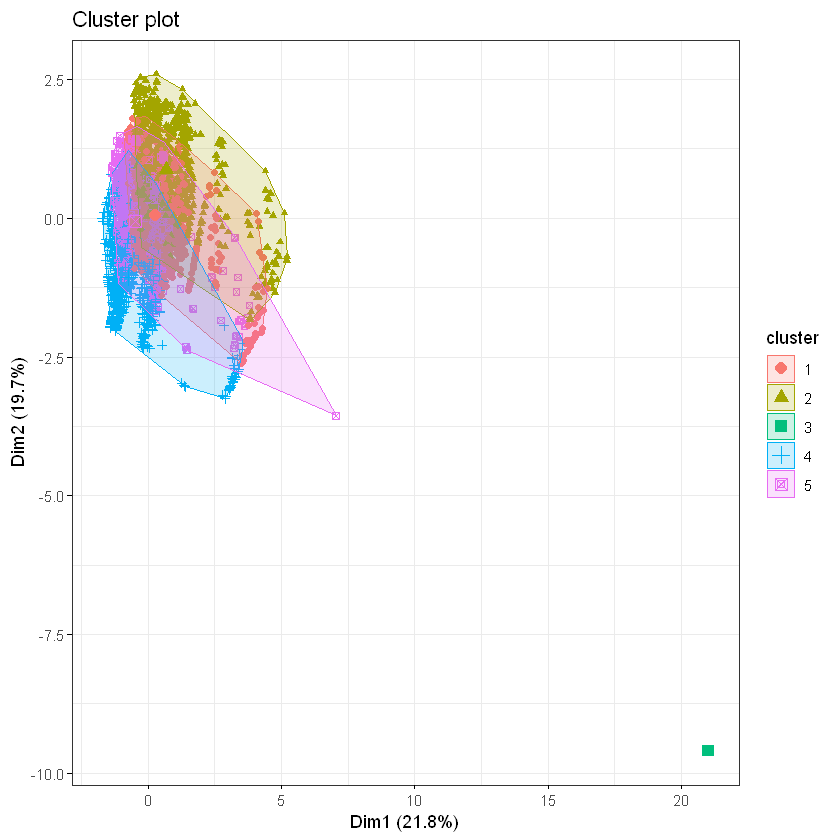

In [6]:
fviz_cluster(K, data = Anom, geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
             )

In [7]:
table(K$cluster)


   1    2    3    4    5 
5076 6160    8 4938 4230 

In [8]:
data <- cbind(df, Cluster = K$cluster)

head(data)

UserName,SrcDevice,DstDevice,Authent.Type,Failure,DailyCount,Cluster
User341813,Comp948451,Comp915658,NetworkLogon,0,1,2
User341813,Comp948451,Comp915658,NetworkLogon,0,1,2
User341813,Comp948451,Comp915658,NetworkLogon,0,1,2
User341813,Comp948451,Comp915658,NetworkLogon,0,1,2
User341813,Comp948451,Comp915658,NetworkLogon,0,1,2
User341813,Comp948451,Comp915658,NetworkLogon,0,1,2


In [9]:
data[data$Cluster==3, ]

,UserName,SrcDevice,DstDevice,Authent.Type,Failure,DailyCount,Cluster
13024,AppService,EnterpriseAppServer,None,InteractiveLogon,1,17102,3
13117,AppService,EnterpriseAppServer,None,InteractiveLogon,1,17112,3
13218,AppService,EnterpriseAppServer,None,InteractiveLogon,1,17078,3
13219,AppService,EnterpriseAppServer,None,InteractiveLogon,1,17078,3
13340,AppService,EnterpriseAppServer,None,InteractiveLogon,1,17091,3
13395,AppService,EnterpriseAppServer,None,InteractiveLogon,1,17092,3
13438,AppService,EnterpriseAppServer,None,InteractiveLogon,1,17080,3
13663,AppService,EnterpriseAppServer,None,InteractiveLogon,1,17104,3


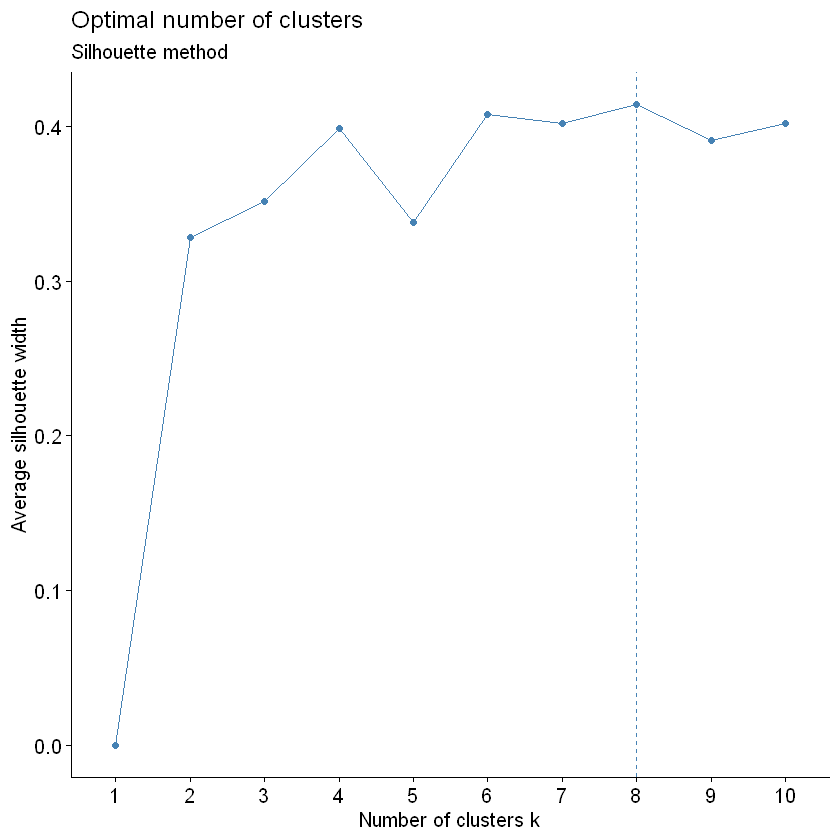

In [10]:
fviz_nbclust(Anom, FUNcluster=kmeans, method='silhouette') + labs(subtitle = "Silhouette method")
                    ## Gap static and elbow methods were also attempted, with poor results or no results at all.
                    ## Undocummented due to extensive computational length.

In [11]:
set.seed(123)
K2 <- kmeans(Anom, centers=5, nstart = 25, algorithm="Hartigan-Wong", iter.max = 10^4)
K3 <- kmeans(Anom, centers=5, nstart = 25, algorithm="MacQueen", iter.max = 10^4)

table(K2$cluster)
table(K3$cluster)
                ## Similar results to 'Lloyd'


   1    2    3    4    5 
5003 4165 5051    8 6185 


   1    2    3    4    5 
4165    8 5002 5072 6165 

In [23]:
set.seed(55)
options(warn=-1)
Km <- vector(len=50)
for(i in 1:50) {
    Km[i] <- kmeans(Anom, centers=5, nstart=i, algorithm="Lloyd", iter.max=10^4)
}

In [24]:
options(warn=1)

In [25]:
table(Km[50])
table(Km[1])
table(Km[25])


   1    2    3    4    5 
4176 5051    8 6174 5003 


   1    2    3    4    5 
2835 4814 3727 4243 4793 


   1    2    3    4    5 
6174    8 5051 4176 5003 

In [50]:
t1<- vector(len=50)
t2<- vector(len=50)
t3<- vector(len=50)
t4<- vector(len=50)
t5<- vector(len=50)
for(i in 1:50) {
    t1[i] <- as.vector(table(Km[i]))[1]
    t2[i] <- as.vector(table(Km[i]))[2]
    t3[i] <- as.vector(table(Km[i]))[3]
    t4[i] <- as.vector(table(Km[i]))[4]
    t5[i] <- as.vector(table(Km[i]))[5]
}

t1<- t1[order(t1, decreasing=FALSE)]
t2<- t2[order(t2, decreasing=FALSE)]
t3<- t3[order(t3, decreasing=FALSE)]
t4<- t4[order(t4, decreasing=FALSE)]
t5<- t5[order(t5, decreasing=FALSE)]

s1<- scale(t1)
s2<- scale(t2)
s3<- scale(t3)
s4<- scale(t4)
s5<- scale(t5)

In [53]:
manhattan_dist <- function(a, b){
     dist <- abs(a-b)
     dist <- sum(dist)
     return(dist)
}

In [56]:
manhattan_dist(s1, s2)
manhattan_dist(s1, s3)
manhattan_dist(s1, s4)
manhattan_dist(s1, s5)
cat("\n")
manhattan_dist(s2, s3)
manhattan_dist(s2, s4)
manhattan_dist(s2, s5)
cat("\n")
manhattan_dist(s3, s4)
manhattan_dist(s3, s5)
cat("\n")
manhattan_dist(s4, s5)

[1] 22.18659

[1] 22.07769

[1] 25.13818

[1] 17.99797

[1] 5.808436

[1] 6.608473

[1] 13.95672

[1] 9.62185

[1] 11.73321

[1] 17.01018

#### Setting up each of the 5 stages' properties

_Idea: All events start with a score of 0 to belong to StageN, N from 1 to 5. They get assigned +0.25, +0.5, +1 or +2 based on certain properties. This happens for all 5 stages, at which point they get shifted by a +5% of the total for each event (to avoid probabilities of 0) and numbers get transformed to probabilities (0 to 1). These 5 become features for clustering afterwards._

#### Recon